
# Project: Investigate TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I decided to analyze the TMDb movie data, found on Kaggle.

1. What genres are the most popular among the movies made?
2. What are key factors in a successful movie? What features are associated with movies that have high revenues?

Imports for processing, analyzing and visualizing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Overview
Loading the data and looking at the first five rows + showing the info of the DataFrame.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

As we can see there are duplicate columns for budget and revenue, which are accounting for inflation over time - as those sound more relevant we use those columns and will drop the "normal" budget + revenue columns. 

Additionally the release_date is an object type opposed to a DateTime type, maybe we have to change the type of that column.

Homepage has a huge count of null values, so we should remove that column aswell.

The count of the other null values are not as significant, so we'll decide later if we should impute or delete those rows.


In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Nothing out of the ordinary here, duplicates are expected (like release_year, director etc.).

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some values don't make sense here, for example the minimum budget, revenue and runtime being 0. We'll investigate that later.


### Data Cleaning
There are several data cleaning task that we have to do before we proceed to analyse the data:

1. Remove unnecessary columns that are not needed, such as the imdb_id, budget, revenue, etc.

2. Checking for and dropping duplicate rows.

3. Drop rows which do not make sense (budget, revenue or runtime = 0).

2. Drop rows that have no genre information.

3. Change the data type of release_date into 'datetime'.


In the genres and director columns there are entries with multiple genres or directors, split by a pipe sign. We'll handle those later.

In [6]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'tagline'], axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop(df[df['budget_adj'] == 0].index, inplace=True)

In [9]:
df.dropna(inplace=True, subset=['genres', 'production_companies'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5032 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5032 non-null   int64  
 1   popularity            5032 non-null   float64
 2   original_title        5032 non-null   object 
 3   cast                  5024 non-null   object 
 4   director              5029 non-null   object 
 5   runtime               5032 non-null   int64  
 6   genres                5032 non-null   object 
 7   production_companies  5032 non-null   object 
 8   release_date          5032 non-null   object 
 9   vote_count            5032 non-null   int64  
 10  vote_average          5032 non-null   float64
 11  release_year          5032 non-null   int64  
 12  budget_adj            5032 non-null   float64
 13  revenue_adj           5032 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 589.7+ KB


In [11]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

Let's check if the year of the release date matches the release year.

In [12]:
(df['release_date'].dt.year == df['release_year']).all()

False

In [13]:
(df['release_date'].dt.year == df['release_year']).any()

True

This seems to not be the case for every entry, just some of them - let's see why.

In [14]:
temp = pd.DataFrame()
temp['release_date'] = df['release_date'].dt.year.describe()
temp['release_year'] = df['release_year'].describe()
temp

,release_date,release_year
count,5032.000000,5032.000000
mean,2003.404809,2001.139308
std,13.961517,11.848320
min,1969.000000,1960.000000
25%,1996.000000,1995.000000
50%,2005.000000,2004.000000
75%,2011.000000,2010.000000
max,2068.000000,2015.000000


In [15]:
df[df['release_date'].dt.year == 2068].head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,62,3.309196,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08


In [16]:
df[df['release_year'] < 1968].head(5)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9849,646,3.170651,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,Terence Young,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,1962,7.929294e+06,4.296236e+08
9850,947,1.168767,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,216,Adventure|Drama|History|War,Horizon Pictures (II),2062-12-10,517,7.5,1962,1.081267e+08,5.045914e+08
9851,802,0.823779,Lolita,James Mason|Sue Lyon|Shelley Winters|Peter Sel...,Stanley Kubrick,153,Drama|Romance,Seven Arts Productions|Allied Artists|Transwor...,2062-06-13,168,6.9,1962,1.441690e+07,0.000000e+00
9852,595,0.810805,To Kill a Mockingbird,Gregory Peck|John Megna|Frank Overton|Rosemary...,Robert Mulligan,129,Crime|Drama,Universal Pictures,2062-12-25,317,7.7,1962,1.441690e+07,9.464582e+07
9853,982,0.630948,The Manchurian Candidate,Frank Sinatra|Laurence Harvey|Angela Lansbury|...,John Frankenheimer,126,Mystery|Thriller,MC Productions,2062-10-24,72,7.0,1962,1.585859e+07,0.000000e+00


In [17]:
df[df['release_year'] == 1969].head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10724,668,1.778746,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,1969-12-12,258,6.4,1969,4.160985e+07,4.872780e+08


Something seems to be wrong with the release_date, as there surely are no plans yet, for movies to be released in 2068.

Checking for a movie with year 2068 we can see, that the release year is 1968 as opposed to 2068. 

Checking further we see, that there seems to be a cutoff at 1969, at which the dates are correct again. 

Everything below that cutoff is being converted to a new century (for example 2062 instead of 1962). 

We'll fix it by replacing the year of the release date column with the year of the release year column.

In [18]:
temp_date = pd.to_datetime({'year': df['release_year'], 'month': df['release_date'].dt.month, 'day': df['release_date'].dt.day})

print(
    (temp_date.dt.month == df['release_date'].dt.month).all(),
    (temp_date.dt.day == df['release_date'].dt.day).all(),
    (temp_date.dt.year == df['release_year']).all()
    )

True True True


In [19]:
df['release_date'] = temp_date

<a id='eda'></a>
## Exploratory Data Analysis
### Create functions to make the notebook more readable


In [20]:
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)


### What genres are the most popular?
Let's split up the genres!

First we'll split up the multiple genres in a column and then convert them into a list.

Afterwards we'll plot the frequency of the genres.

In [21]:
genresList = df['genres'].str.split('|')
genres = []
for i in genresList:
    genres.extend(i)
genres = pd.Series(genres)
genres_sorted = genres.value_counts()[:10].sort_values(ascending=False)

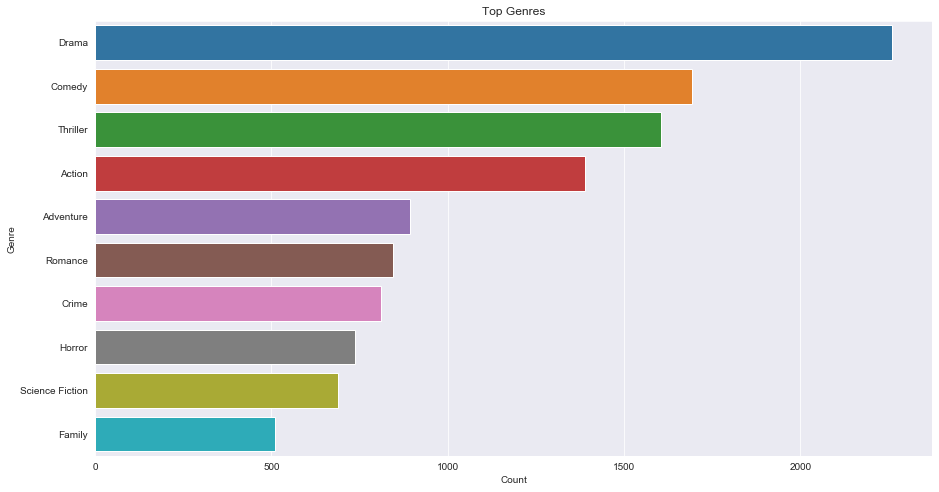

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.title('Top Genres')
set_label('Count', 'Genre')
sns.barplot(x = genres_sorted, y = genres_sorted.index);

### What are key factors in a successful movie (successful in this case meaning high profit)? What features are associated with movies that have high revenues?
First we'll calculate the profit out of the revenue and budget per movie and look at some descriptive statistics + plots.

In [23]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [24]:
df['profit'].describe()

count    5.032000e+03
mean     6.718297e+07
std      1.763396e+08
min     -4.139124e+08
25%     -8.005555e+06
50%      4.669757e+06
75%      7.144782e+07
max      2.750137e+09
Name: profit, dtype: float64

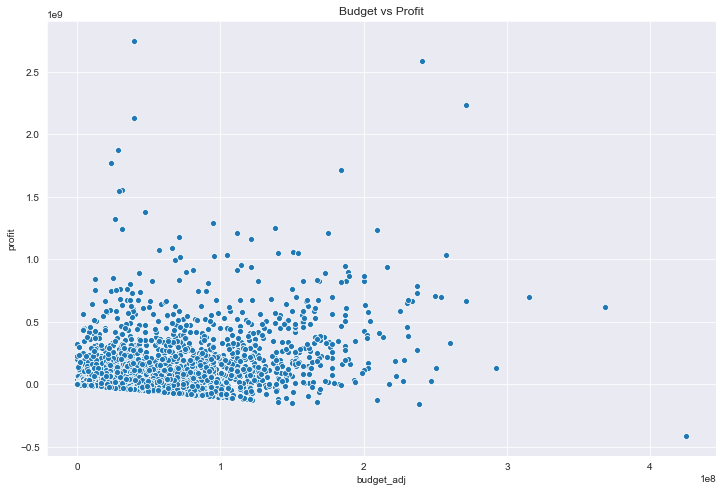

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget_adj', y='profit', data = df).set_title('Budget vs Profit');

We can see that at least 25% of the producted movies don't make profit.

The plot doesn't show much correlation between the profit and the used budget, but we can see that as a bigger budget is used the profit gets lower aswell. 

We'll look at the correlation matrix now and try to see if we can find some LINEAR correlations with profit.

In [26]:
df.corr()['profit']

id             -0.080975
popularity      0.541535
runtime         0.201220
vote_count      0.636047
vote_average    0.288796
release_year   -0.097070
budget_adj      0.421713
revenue_adj     0.981128
profit          1.000000
Name: profit, dtype: float64

We can see that revenue obviously has a high profit but this won't help us in identifying features for a succesful movie. 

Vote_count has the second highest correlation but it doesn't help aswell, because movies are voted on after the movie has been made. 

That also applies to vote_average and popularity, so the only other variables left are runtime and release_year - which have very low correlation and negative correlation respectively.

We'll plot those to see if we can see something, which is not being found in the correlation matrix.

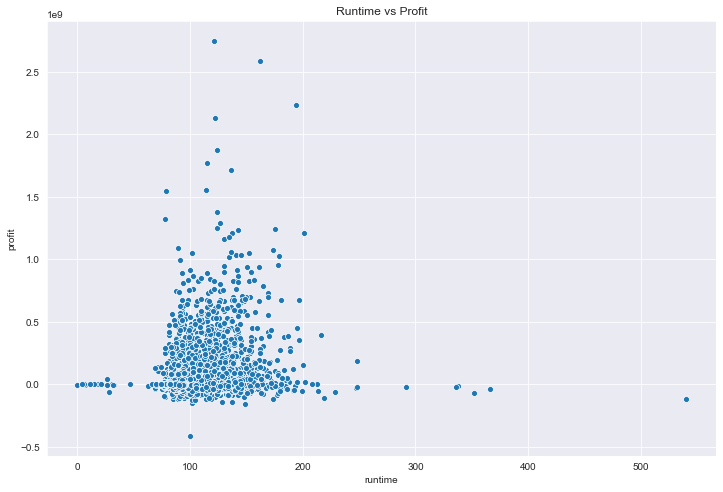

In [27]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='runtime', y='profit', data = df).set_title('Runtime vs Profit');

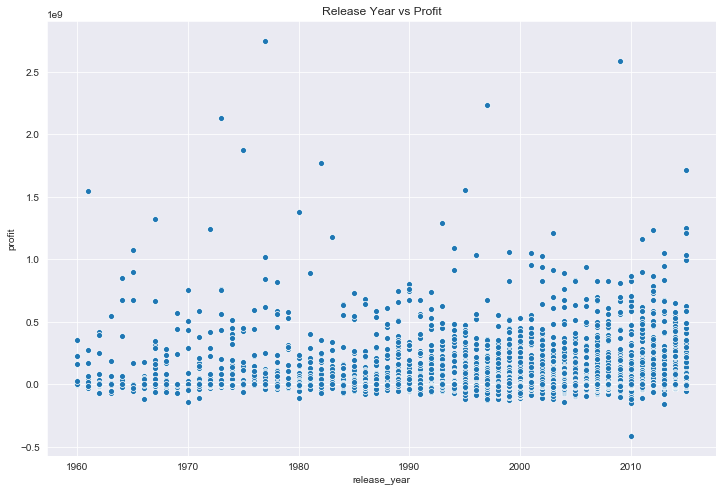

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='profit', data = df).set_title('Release Year vs Profit');

As expected there doesn't seem to be a strong correlation between those variables. But we can see that most of the movies made are in the 90-200 minutes range.

Same goes for the release year, there doesn't seem to be a specific year, where more succesful movies are made. One thing we can see is, that the frequency of movies being made has drastically improved. 

We'll look at this now.

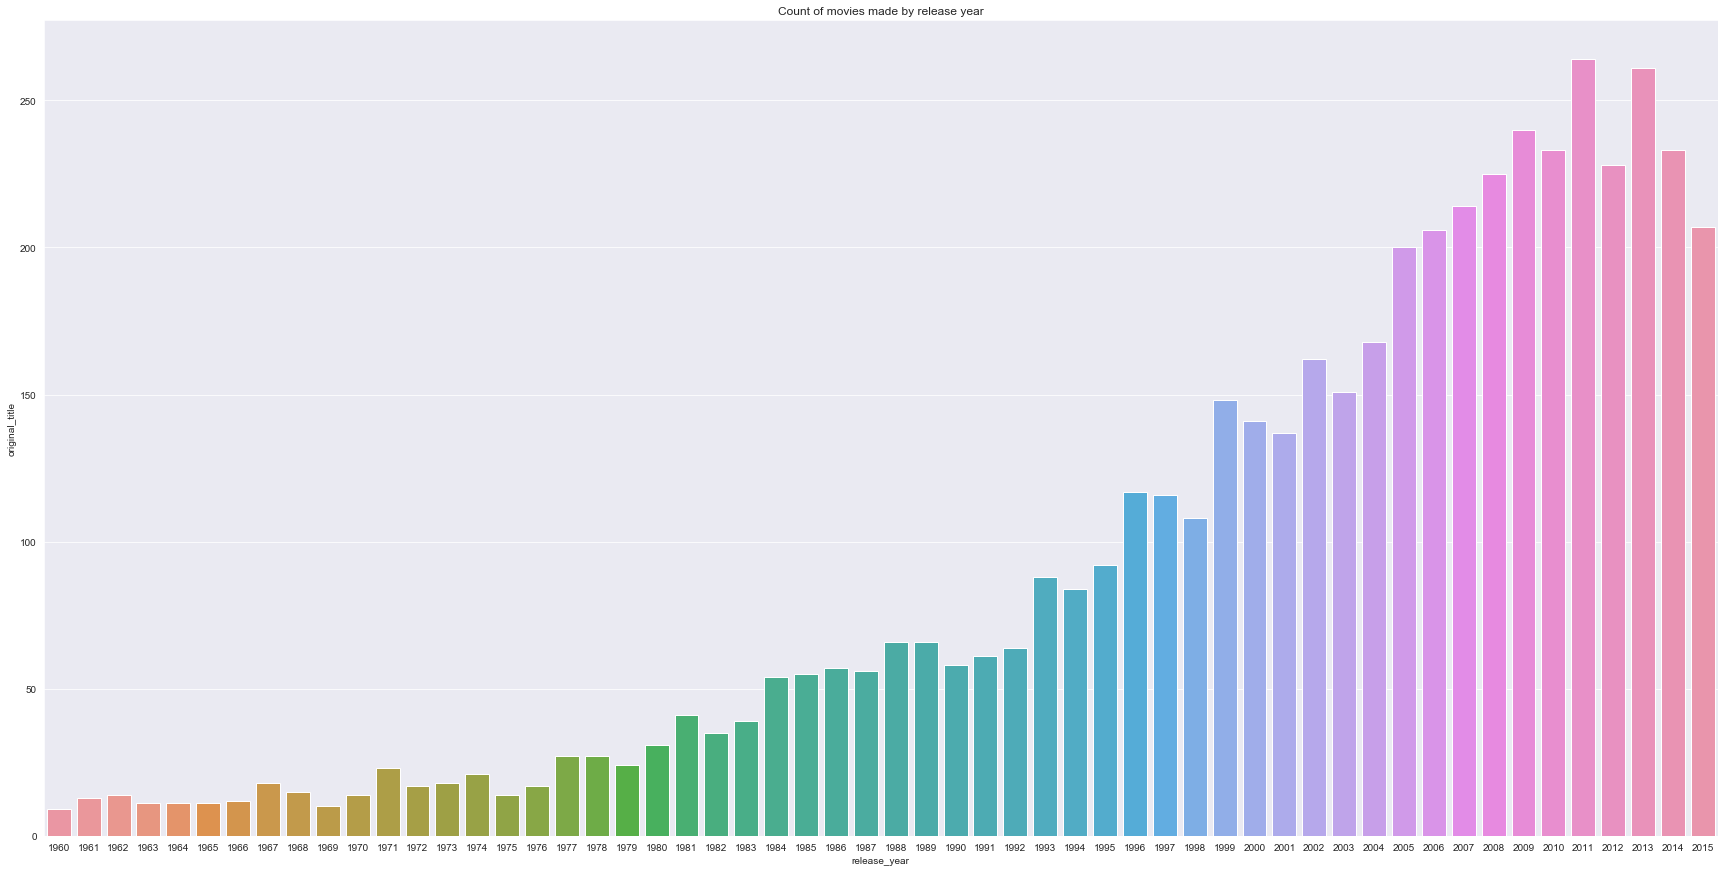

In [29]:
plt.figure(figsize=(30,15))
sns.barplot(x = pd.Series(df.groupby('release_year')['original_title'].count()).index, y = pd.Series(df.groupby('release_year')['original_title'].count())).set_title('Count of movies made by release year');

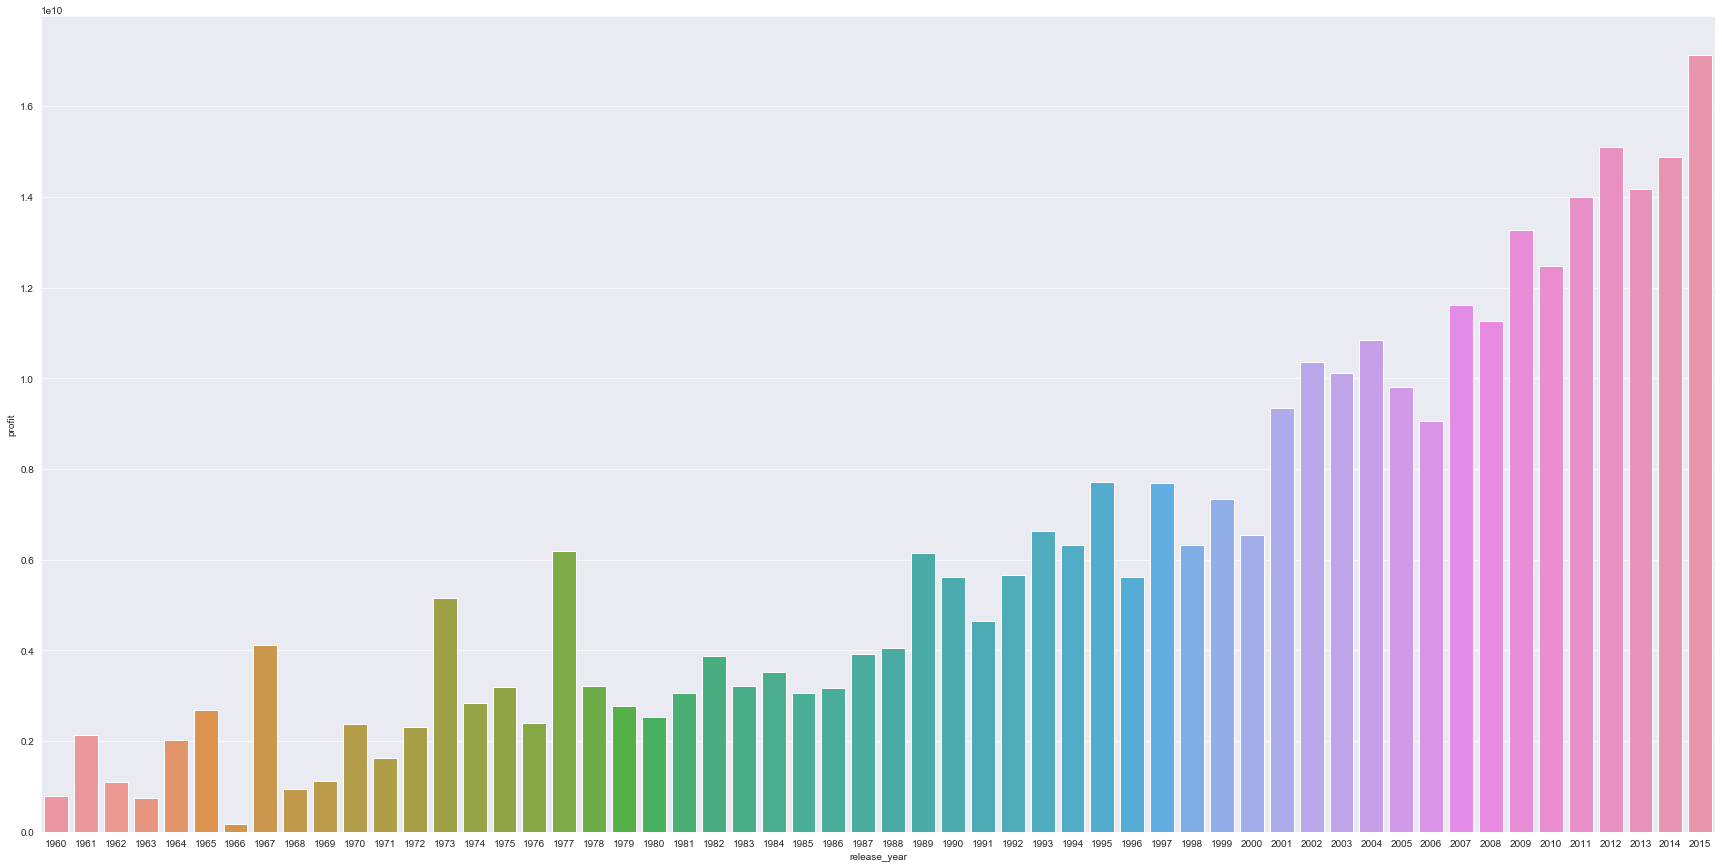

In [30]:
plt.figure(figsize=(30,15))
sns.barplot(x = pd.Series(df.groupby('release_year')['profit'].sum()).index, y = pd.Series(df.groupby('release_year')['profit'].sum()));

We can see that the amount of movies being made is definitely getting higher as time progresses.

The same goes for the profit being made per year.

<a id='conclusions'></a>
## Conclusions

### Movie Genre
Drama is the most popular genre followed by Comedy.

### Profit Contributors
Unfortunately we couldn't pinpoint a certain feature which has direct correlation to the profit.
But following things is stuff we found out:

1. A high budget does not automatically lead to a succesful movie (high profit).
2. As time progresses more movies are being made on average and more profit is being gained on average.
4. Most movies made are in the 90-200 minutes range.

### Limitation
We mostly regarded the numerical features for seeing what has the most impact on profit. 

Aside from genres we didn't consider the other textual features at all, which would surely help in determining the features (I'm pretty sure actors play a big role in a movie being succesful!).

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295